Selecciona una opción para convolucionar:
1. Caso (a)
2. Caso (b)
3. Caso (c)
Elige una opción (1-3): 3

Selecciona el método de convolución:
1. Convolución manual (solución matemática)
2. Convolución usando np.convolve
Elige el método (1-2): 2


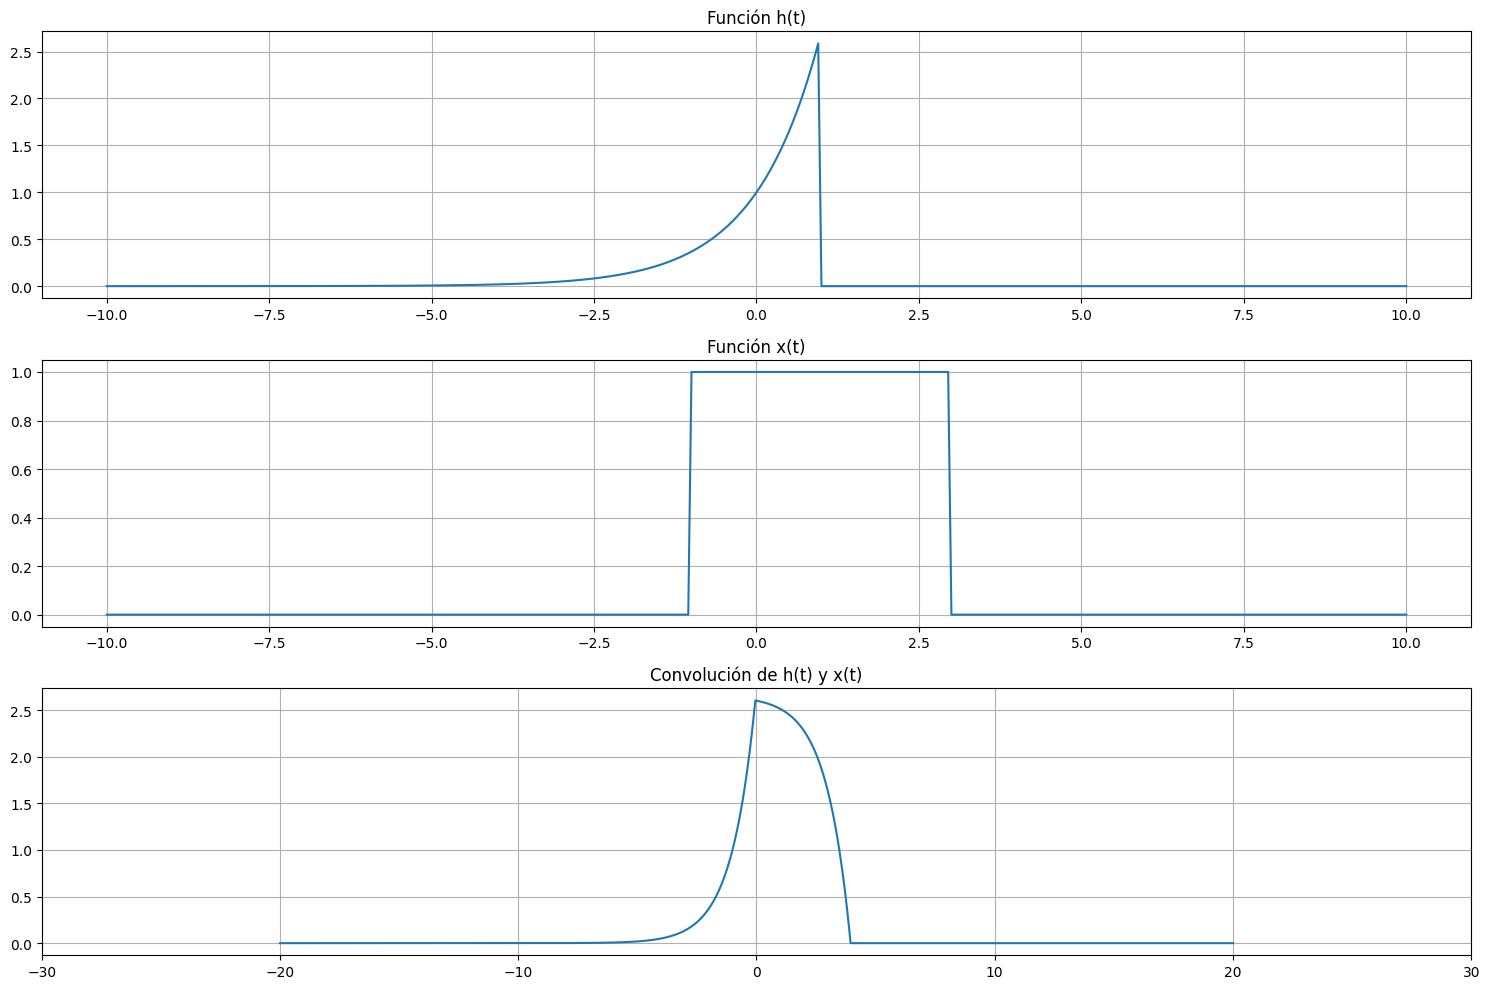

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import matplotlib.cm as cm

# Definición de las funciones

def u(t):
    return np.where(t >= 0, 1, 0)

# Caso (a)
def func_a_h(x, delta=0.05):
    t = np.arange(-10, 10 + delta, delta)
    h_t = np.exp(4*t/5) * u(t)  # h(t) = e^(4t/5)u(t)
    return t, h_t

def func_a_x(x, delta=0.05):
    t = np.arange(-10, 10 + delta, delta)
    x_t = np.exp(-3*t/4) * (u(t+1)-u(t-5))  # x(t) = e^(-3t/4)[u(t+1) - u(t-5)]
    return t, x_t

# Caso (b)
def func_b_h(x, delta=0.05):
    t = np.arange(-10, 10 + delta, delta)
    h_t = np.exp(-5*t/4) * u(t+1)  # h(t) = e^(-5t/4)u(t+1)
    return t, h_t

def func_b_x(x, delta=0.05):
    t = np.arange(-10, 10 + delta, delta)
    x_t = np.exp(t) * (u(-t)-u(-t-3)) + np.exp(-t) * (u(t)-u(t-3))  # x(t) según la imagen
    return t, x_t

# Caso (c)
def func_c_h(x, delta=0.01):
    t = np.arange(-10, 10 + delta, delta)
    h_t = np.exp(t) * u(-t+1)  # h(t) = e^t u(1 - t)
    return t, h_t

def func_c_x(x, delta=0.01):
    t = np.arange(-10, 10 + delta, delta)
    x_t = u(t+1)-u(t-3)  # x(t) = u(t+1) - u(t-3)
    return t, x_t

# Función para convolucionar (sin usar np.convolve)
def convolucionar(func1, func2):

    delta=0.05
    # Recuperamos t y f_t de cada función
    ta, x_t = func1(None,delta)
    tb, h_t = func2(None, delta)

    #Graficamos las funciones originales
    plt.figure()
    plt.subplot(1,2,1)
    plt.plot(ta,x_t)
    plt.subplot(1,2,2)
    plt.plot(tb,h_t)

    #Rango de tiempo en el que se va a realizar la convolución entre las dos funciones func1 y func2.
    ini = min(ta)-(round(max(tb),2)-min(tb))
    fin = round(max(ta),2)+(round(max(tb),2)-min(tb))   #round redondea el valor máximo a 2 decimales
    print(ini)
    print(fin)

    #Crea el eje de tiempo para la convolución (puntos de evaluación de la convolución)
    eje_tau = np.arange(ini,fin+delta,delta)
    #Se crea un array vacío para almacenar los resultados de la convolución
    eje_conv = np.zeros(len(eje_tau))

    x_tau = x_t

    #Se refleja h_t
    h_mtau = np.flip(h_t)

    #Se gráfica x_t y h_t reflejada
    plt.figure()
    plt.subplot(1,2,1)
    plt.plot(ta,x_tau)
    plt.subplot(1,2,2)
    plt.plot(tb,h_mtau)

    #Se prepara la señal x_tau para la operación de convolución: Se añaden ceros a la señal x_tau para
    #que h_mtau se desplace a la izquierda y a la derecha sin perder información
    t_x_tau = np.concatenate((np.zeros(len(h_mtau)-1),x_tau,np.zeros(len(h_mtau)-1)))

    #Bucle que controla el desplazamiento (tau) de la señal h_mtau a lo largo de x_tau.
    for tau in range(0,len(x_tau)-1+len(h_mtau)-1):
      #Versión desplazada de h_mtau
      #Crea ceros adicionales para completar la señal a la misma longitud que t_x_tau.
      t_h_tmtau = np.concatenate((np.zeros(tau),h_mtau,np.zeros(len(x_tau)-1+len(h_mtau)-1-tau)))

      #Indice actual en eje_conv donde se almacenará el resultado de la convolución
      idx = tau+len(h_mtau)-1
      #Multiplicación punto a punto entre t_x_tau (señal original con ceros añadidos) y
      #t_h_tmtau (versión desplazada de h_mtau).
      prod = t_x_tau * t_h_tmtau
      #Se integra el producto prod a lo largo de eje_tau
      eje_conv[idx] = scipy.integrate.simps(prod, eje_tau)

      plt.figure()
      plt.subplot(2,1,1)
      plt.plot(eje_tau,t_x_tau,'g')               #Dibuja la señal t_x_tau en verde
      plt.plot(eje_tau,t_h_tmtau,'m')             #Dibuja la señal desplazada t_h_tmtau en magenta
      plt.plot(eje_tau,prod)                      #producto punto a punto de las señales
      plt.fill_between(eje_tau, prod,cmap=cm.bwr) #Rellena el área bajo el producto para ayudar a visualizar la multiplicación
      plt.plot(eje_tau[idx],0,'ro')               #Marca el punto actual de idx en rojo
      plt.subplot(2,1,2)
      plt.plot(eje_tau,eje_conv)                  #Dibuja el resultado acumulativo de la convolución
      plt.plot(eje_tau[idx],eje_conv[idx],'ro')   #Valor actual de la convolución en rojo
      plt.show()


# Función para convolucionar (usando np.convolve)
def convolucionar_np(func1_h, func1_x):
    delta = 0.05  # Definición del paso
    t = np.arange(-30, 30, delta)  # Eje temporal

    # Evaluamos las funciones
    t_h, h_t = func1_h(None, delta)
    t_x, x_t = func1_x(None, delta)

    # Longitud de las señales y creación del rango temporal para la convolución completa
    len_h = len(h_t)
    len_x = len(x_t)
    len_conv = len_h + len_x - 1  # Longitud esperada para 'full'

    # Ajuste del rango temporal para abarcar todo el proceso de convolución
    t_conv = np.linspace(t_h[0] + t_x[0], t_h[0] + t_x[0] + (len_conv - 1) * delta, len_conv)
    #Se crea un nuevo rango de tiempo para la convolución:
      #Empieza en la suma de los valores iniciales de t_h y t_x y termina después
      #de abarcar todos los desplazamientos posibles entre las dos señales

    # Realizamos la convolución
    conv_result = np.convolve(h_t, x_t, mode='full') * delta
    #Full: todas las posibles superposiciones entre las señales, incluso cuando
    #una está completamente desplazada hacia la otra.
    #delta: escala el resultado al paso temporal

    # Graficamos las funciones y la convolución
    plt.figure(figsize=(15, 10))

    plt.subplot(3, 1, 1)
    plt.plot(t_h, h_t, label='h(t)')
    plt.title('Función h(t)')
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(t_x, x_t, label='x(t)')
    plt.title('Función x(t)')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(t_conv, conv_result, label='Convolución h(t)*x(t)')
    plt.title('Convolución de h(t) y x(t)')
    plt.xlim(-30, 30)  # Ajusta el rango del eje x
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Menú de selección para elegir el método de convolución
def menu():
    print("Selecciona una opción para convolucionar:")
    print("1. Caso (a)")
    print("2. Caso (b)")
    print("3. Caso (c)")

    eleccion = int(input("Elige una opción (1-3): "))

    print("Selecciona el método de convolución:")
    print("1. Convolución manual (solución matemática)")
    print("2. Convolución usando np.convolve")

    metodo = int(input("Elige el método (1-2): "))

    if eleccion == 1:
        if metodo == 1:
            convolucionar(func_a_h, func_a_x)
        if metodo == 2:
            convolucionar_np(func_a_h, func_a_x)
    elif eleccion == 2:
        if metodo == 1:
            convolucionar(func_b_h, func_b_x)
        if metodo == 2:
            convolucionar_np(func_b_h, func_b_x)
    elif eleccion == 3:
        if metodo == 1:
            convolucionar(func_c_h, func_c_x)
        if metodo == 2:
            convolucionar_np(func_c_h, func_c_x)
    else:
        print("Selección inválida. Inténtalo de nuevo.")

menu()
